In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import sklearn.discriminant_analysis as da
import sklearn.neighbors as nb
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

c:\users\kulbear\appdata\local\conda\conda\envs\py35\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 4.6.1 The Stock Market Data

In [2]:
Smarket = pd.read_csv('../data/Smarket.csv', index_col=0)
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [4]:
Smarket.shape

(1250, 9)

In [5]:
Smarket.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,648
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,NaN
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,NaN
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,NaN
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,NaN
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,NaN
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,NaN


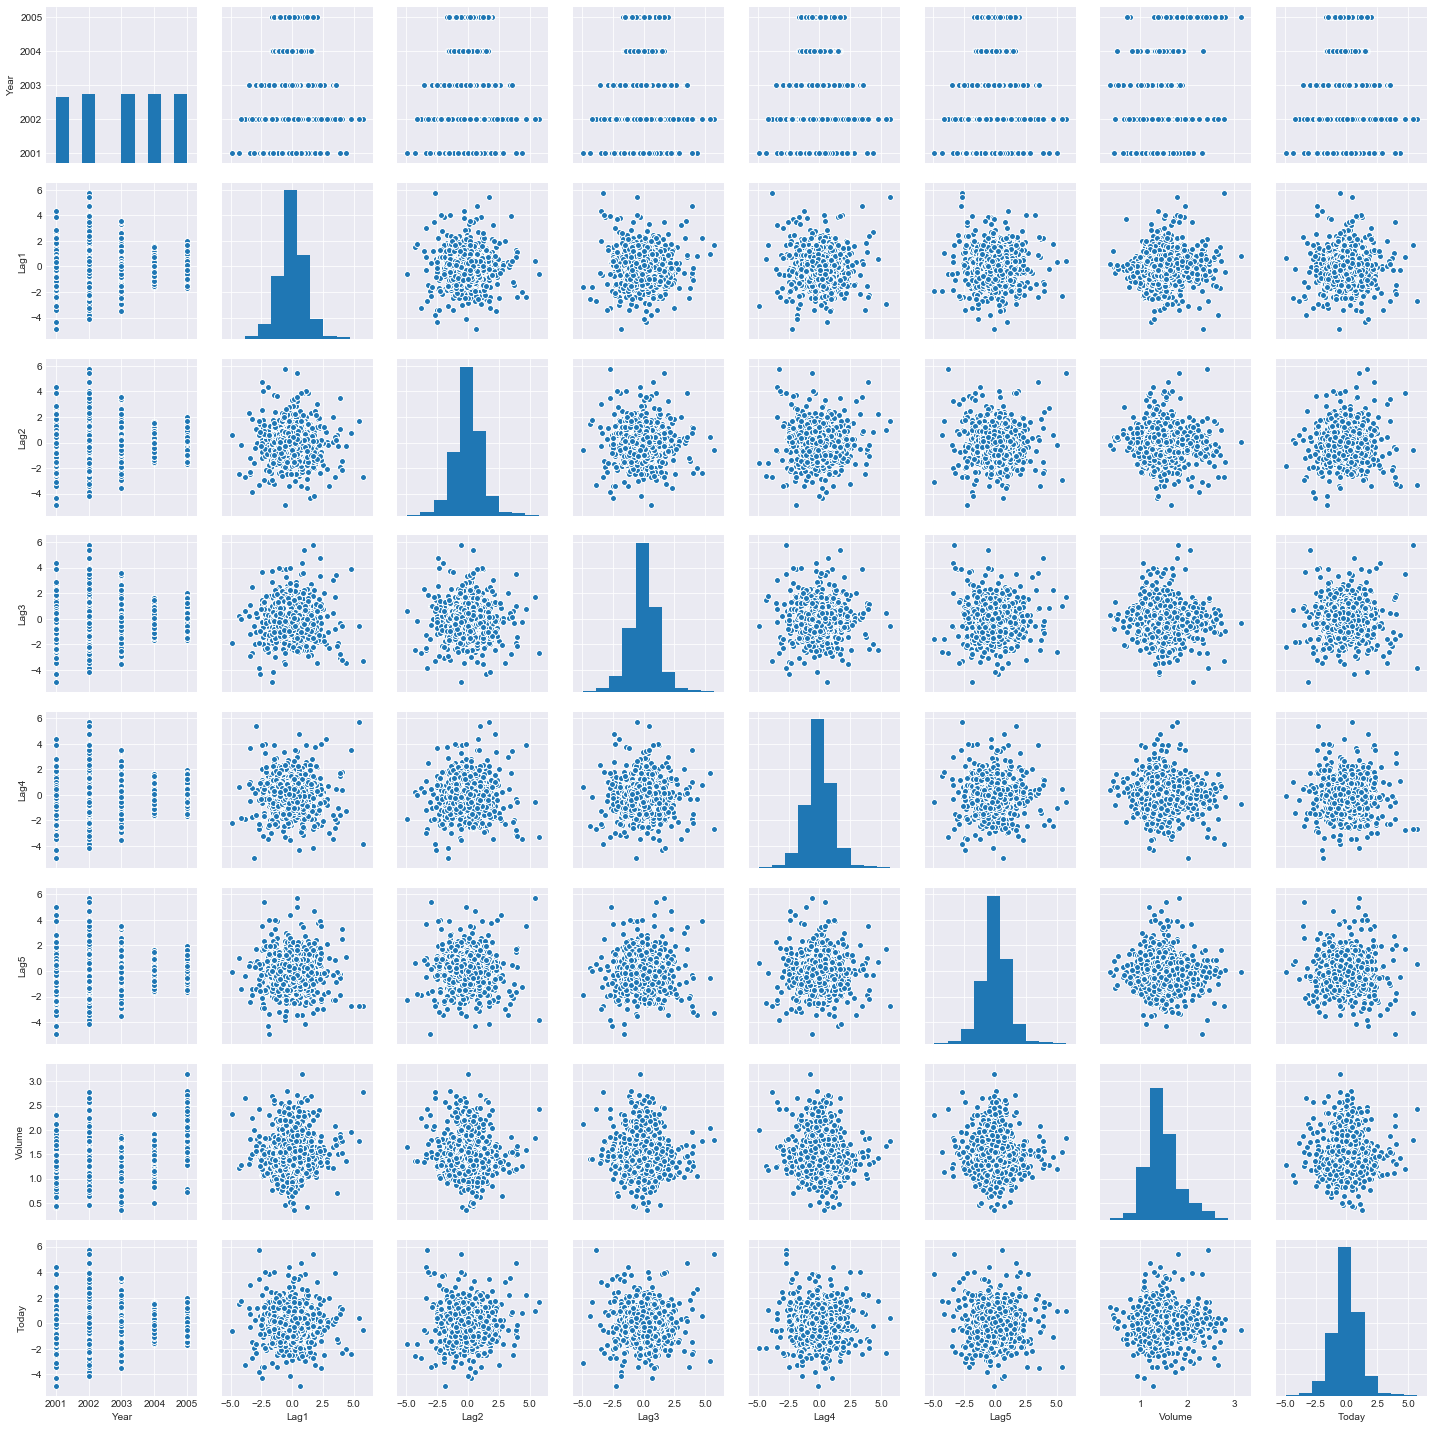

In [6]:
sns.pairplot(Smarket)

In [7]:
cm = Smarket.corr()
cm

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [8]:
# Generate a mask for the upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

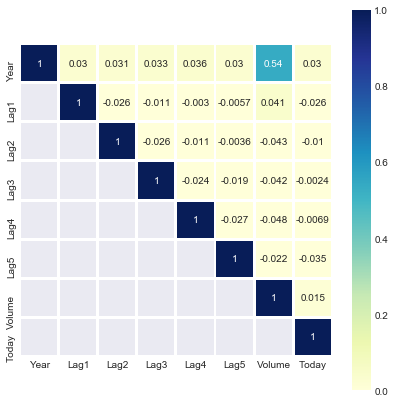

In [9]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, mask=mask, vmin=0, vmax=1, linewidths=2, cmap='YlGnBu', square=True)
plt.show()

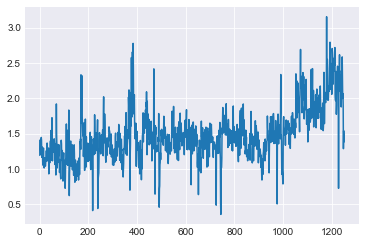

In [10]:
plt.plot(Smarket.Volume)
plt.show()

## 4.6.2 Logistic Regression

In [11]:
lags = [x for x in Smarket.columns if 'Lag' in x]
lags.append('Volume')
formula = 'Direction~' + '+'.join(lags)
formula

'Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume'

In [12]:
mod1 = smf.glm(formula=formula, data=Smarket, family=sm.families.Binomial()).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Wed, 09 Aug 2017   Deviance:                       1727.6
Time:                                          17:34:14   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1260      0.241      0.523      0.601      -0.346       0.598
Lag1           0.0731      0.050      1.457      0.145      -0.025       0.171
Lag2           0.0423      0.050      0.845      0.398      -0.056       0.140
Lag3          -0.0111      0.050     -0.222      0.824      -0.109       0.087
Lag4          -0.0094      0.050     -0.187      0.851      -0.107       0.089
Lag5          -0.0103      0.050     -0.208      0.835      -0.107       0.087
Volume        -0.1354      0.158     -0.855      0.392      -0.446       0.175
==============================================================================
"""

In [13]:
mod1.params

Intercept    0.126000
Lag1         0.073074
Lag2         0.042301
Lag3        -0.011085
Lag4        -0.009359
Lag5        -0.010313
Volume      -0.135441
dtype: float64

## 4.6.3 Linear Discriminant Analysis

In [14]:
Smarket = pd.read_csv('../data/Smarket.csv', usecols=range(1, 10), index_col=0, parse_dates=True)
Smarket.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [15]:
X_train = Smarket[:'2004'][['Lag1','Lag2']]
y_train = Smarket[:'2004']['Direction']

X_test = Smarket['2005':][['Lag1','Lag2']]
y_test = Smarket['2005':]['Direction']

lda = da.LinearDiscriminantAnalysis()
pred = lda.fit(X_train, y_train).predict(X_test)

In [16]:
lda.priors_

array([ 0.49198397,  0.50801603])

In [17]:
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [18]:
lda.coef_

array([[-0.05544078, -0.0443452 ]])

In [19]:
confusion_matrix(y_test, pred).T

array([[ 35,  35],
       [ 76, 106]])

In [20]:
print(classification_report(y_test, pred, digits=3))

             precision    recall  f1-score   support

       Down      0.500     0.315     0.387       111
         Up      0.582     0.752     0.656       141

avg / total      0.546     0.560     0.538       252



In [21]:
pred_p = lda.predict_proba(X_test)
pred_p[:5]

array([[ 0.49017925,  0.50982075],
       [ 0.4792185 ,  0.5207815 ],
       [ 0.46681848,  0.53318152],
       [ 0.47400107,  0.52599893],
       [ 0.49278766,  0.50721234]])

In [22]:
np.unique(pred_p[:,1] > 0.5, return_counts=True)

(array([False,  True], dtype=bool), array([ 70, 182], dtype=int64))

In [23]:
np.unique(pred_p[:,1] > 0.9, return_counts=True)

(array([False], dtype=bool), array([252], dtype=int64))

## 4.6.4 Quadratic Discriminant Analysis

In [24]:
qda = da.QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)

In [25]:
qda.priors_

array([ 0.49198397,  0.50801603])

In [26]:
qda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [27]:
confusion_matrix(y_test, pred).T

array([[ 30,  20],
       [ 81, 121]])

In [28]:
print(classification_report(y_test, pred, digits=3))

             precision    recall  f1-score   support

       Down      0.600     0.270     0.373       111
         Up      0.599     0.858     0.706       141

avg / total      0.599     0.599     0.559       252



## 4.6.5 K-Nearest Neighbors

In [29]:
knn_1 = nb.KNeighborsClassifier(n_neighbors=1)
knn_4 = nb.KNeighborsClassifier(n_neighbors=4)
knn_1_model = knn_1.fit(X_train, y_train)
knn_4_model = knn_4.fit(X_train, y_train)

In [30]:
pred1 = knn_1_model.predict(X_test)
pred4 = knn_4_model.predict(X_test)

In [31]:
print(confusion_matrix(y_test, pred1).T)
print(confusion_matrix(y_test, pred4).T)

[[43 58]
 [68 83]]
[[71 82]
 [40 59]]


In [32]:
print(classification_report(y_test, pred1, digits=3))

             precision    recall  f1-score   support

       Down      0.426     0.387     0.406       111
         Up      0.550     0.589     0.568       141

avg / total      0.495     0.500     0.497       252



In [33]:
print(classification_report(y_test, pred4, digits=3))

             precision    recall  f1-score   support

       Down      0.464     0.640     0.538       111
         Up      0.596     0.418     0.492       141

avg / total      0.538     0.516     0.512       252

